In [5]:
import csv
table = []
with open('klimat.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=';', quotechar='|')
    for row in reader:
        table.append(row)
        print(' '.join(row))

 Szer Dług Opady Temp Wys
Wrocław 51.11 17.0222222222222 548 9.7 130
Opole 50.6647222222222 17.9269444444444 611 8.4 176
Katowice 50.2641666666667 19.0236111111111 721 7.9 301
Kraków 50.0613888888889 19.9383333333333 671 8.7 288
Rzeszów 50.0336111111111 22.0047222222222 615 7.5 292
Kielce 50.8741666666667 20.6333333333333 629 7.8 330
Łódź 51.7766666666667 19.4547222222222 582 8.6 220
Poznań 52.4083333333333 16.9341666666667 520 8.4 102
Zielona Góra 51.9397222222222 15.505 600 8.8 143
Szczecin 53.4380555555556 14.5422222222222 539 8 65
Gdańsk 54.3475 18.6452777777778 541 6.7 90
Bydgoszcz 53.125 18.0011111111111 533 8.4 70
Warszawa 52.2322222222222 21.0083333333333 501 8.2 100
Białystok 53.1352777777778 23.1455555555556 574 6.8 140
Lublin 51.2480555555556 22.5702777777778 570 8.4 200
Olsztyn 53.7730555555556 20.4761111111111 654 7.2 120


# Zadanie 12

In [6]:
n = len(table)-1

y = [float(i[4]) for i in table[1:]] #temp
x = [float(i[5]) for i in table[1:]] # wys

sum1 = sum(x[i] * y[i] for i in range(n))
sum2 = sum(x[i] ** 2 for i in range(n))

avg_x = sum(x)/n
avg_y = sum(y)/n

a  = (sum1 - n*avg_x*avg_y) / (sum2 - n*(avg_x**2))
b = avg_y - a * avg_x
print(f'Prosta regresji to:\nTemp = {a} * x + {b}')

Prosta regresji to:
Temp = 0.00021858661501265034 * x + 8.05594817726625


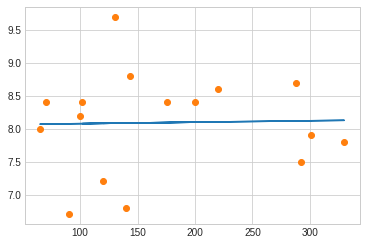

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()

x = x
reg = [a*x[i] + b for i in range(n)]
ax.plot(x, reg);
plt.plot(x, y, 'o')


# Zadanie 13

In [8]:
import numpy as np

X = np.array([ [1,float(i[1]) , float(i[2])] for i in table[1:]])#szer, dlug
Y = np.array([float(i[4]) for i in table[1:]]) #temp

XT = X.transpose()
M = np.linalg.inv(XT.dot(X))
B = M.dot(XT.dot(Y))

In [9]:
print(f'Prosta regresji to:\nTemp = {B[1]} * x {B[2]}* z + {B[0]}')

Prosta regresji to:
Temp = -0.3280915557017341 * x -0.17775028886334* z + 28.531073457171487


In [11]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

zdata = Y
xdata = [X[i][1] for i in range(len(X))]
ydata = [X[i][2] for i in range(len(X))]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

zline = [xdata[i]*B[1] + ydata[i]*B[2] + B[0] for i in range(len(zdata))]
ax.plot_surface(xdata, ydata, zline)

AttributeError: 'list' object has no attribute 'ndim'